# **Predição da qualidade do vinho baseada em suas propriedades físico-químicas**




In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import metrics

## **Lendo e observando os dados**
*separar os dados com pontoe vírgula para a leitura em csv ficar correta

In [ ]:
data = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

red_wine = pd.read_csv(data, sep = ';')

print(red_wine.shape)
red_wine.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# **Procurando valores incompletos na tabela**

*Não há nenhum termo faltando

In [ ]:
red_wine.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

# **Procurando por dados fora da curva**
* função describe
* dispersões


In [ ]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **Retirando outliers**
* Z-score


In [ ]:
z = np.abs(stats.zscore(red_wine))
red_wine = red_wine[(z < 3).all(axis=1) ]
red_wine.shape

(1451, 12)

# **Buscando por correlações**
*Heatmap


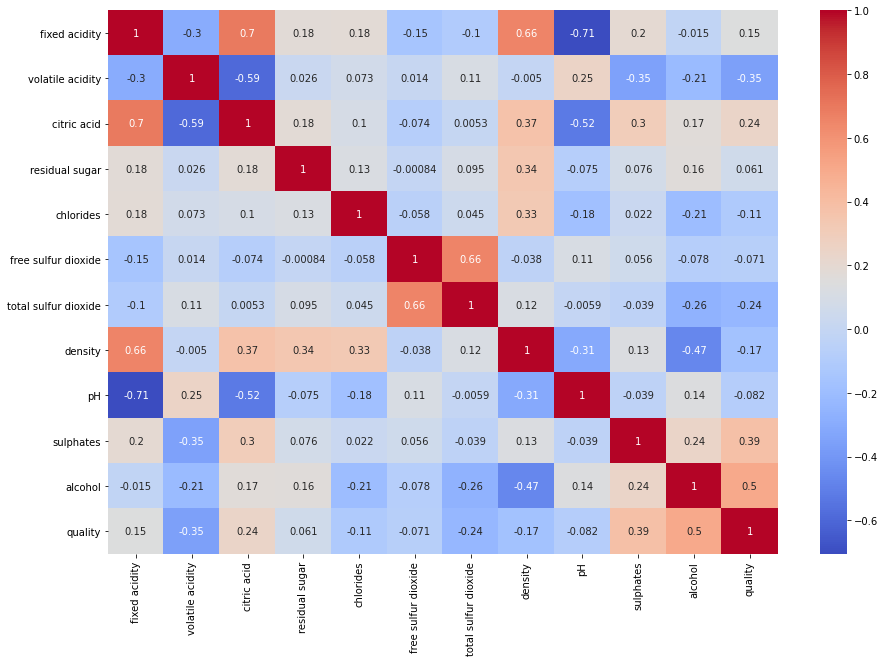

In [ ]:
plt.subplots(figsize = (15, 10))
sns.heatmap(red_wine.corr(), annot = True, cmap = 'coolwarm')

# **Pré processmaneto de dados**
* Definindo as características de treinamento
* Padronizando

array = matriz
iloc = seleciona linhas e colunas

In [ ]:
X = np.asarray(red_wine.iloc[:, :-1 ])

Y = np.asarray(red_wine['quality']) 

In [ ]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
print("Train set:", X_train.shape, Y_train.shape)
print("Test set:", X_test.shape, Y_test.shape)

Train set: (1160, 11) (1160,)
Test set: (291, 11) (291,)


### **Selecionando o modelo ideal**
*K-nearest neighbors

*Decision tress

*Random forest

*logistisc regression

# *K-nearest neighbors*(KNN)

* Observando a variação da acurácia com o número de k

* Validando KNN

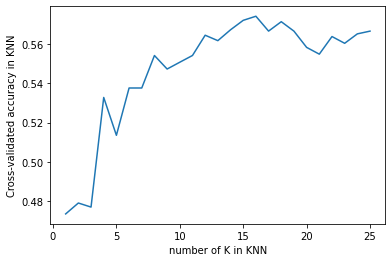

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


k_range = range(1,26)

k_score = []
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X , Y, cv = 10, scoring='accuracy')
  k_score.append(scores.mean())

#plotando os gráficos

plt.plot(k_range, k_score)
plt.xlabel("number of K in KNN")
plt.ylabel("Cross-validated accuracy in KNN")
plt.tick_params(labelsize=10)

# **Cross validation with KNN**
k = 16 is higher 


In [ ]:
#treianndo o sistema para k = 16

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# classification report for test set
print(metrics.classification_report(Y_test, Y_pred, digits=3, zero_division = 1))
# Calculate cv score with 'accuracy' scoring and 10 folds
accuracy = cross_val_score(knn, X, Y, scoring = 'accuracy',cv=10)
print('cross validation score',accuracy.mean())
# Calculate cv score with 'roc_auc_ovr' scoring and 10 folds
accuracy = cross_val_score(knn, X, Y, scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc',accuracy.mean())
# Calculate roc_auc score with multiclass parameter
print('roc_auc_score',roc_auc_score(Y_test,knn.predict_proba(X_test), multi_class='ovr'))




              precision    recall  f1-score   support

           4      0.000     0.000     0.000        11
           5      0.638     0.709     0.672       117
           6      0.571     0.623     0.596       122
           7      0.538     0.378     0.444        37
           8      1.000     0.000     0.000         4

    accuracy                          0.595       291
   macro avg      0.550     0.342     0.343       291
weighted avg      0.578     0.595     0.577       291

cross validation score 0.5741568256967406
cross validation score with roc_auc 0.6990007091248781
roc_auc_score 0.711660677899099


# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#treinando e ajustando a árvore de decisão
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, Y_train)


# Avaliando o modelo com conjunto de teste fora da amostra
Y_pred = tree.predict(X_test)

#Resultados da calssificação no teste
print(metrics.classification_report(Y_test, Y_pred.round(), digits=3, zero_division=1))


# Calculate cv score with ‘roc_auc_ovr’ scoring and 10 folds
accuracy = cross_val_score(tree, X, Y, scoring='roc_auc_ovr', cv=10  )
print("cross validtion with roc_auc_ovr accuracy", accuracy.mean())


# Calculate roc_auc score with multiclass parameter
print("roc_auc_score", roc_auc_score(Y_test, tree.predict_proba(X_test), multi_class = 'ovr'))










              precision    recall  f1-score   support

           4      0.200     0.091     0.125        11
           5      0.699     0.675     0.687       117
           6      0.632     0.648     0.640       122
           7      0.467     0.568     0.512        37
           8      0.333     0.250     0.286         4

    accuracy                          0.622       291
   macro avg      0.466     0.446     0.450       291
weighted avg      0.618     0.622     0.618       291

cross validtion with roc_auc_ovr accuracy 0.5843940487030195
roc_auc_score 0.6647897124956815


# **Random Forest**

* Um conjunto de várias árvores de decisão que leva em conta o que maior quantidade dessas árvores indica



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#treinando e ajustando a árvore de decisão
forest = RandomForestClassifier(n_estimators=100, random_state = 0)
forest.fit(X_train, Y_train)

# Avaliando o modelo com conjunto de teste fora da amostra
Y_pred = forest.predict(X_test)

# Resultados da calssificação no teste
print(metrics.classification_report(Y_test, Y_pred, digits=3, ))

accuracy = cross_val_score(forest, X, Y,scoring = 'roc_auc_ovr',cv=10)
print('cross validation score with roc_auc_ovr scoring', accuracy.mean())

print('roc_auc_score', roc_auc_score(Y_test, forest.predict_proba(X_test), multi_class = 'ovr'))





/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           4      0.000     0.000     0.000        11
           5      0.711     0.821     0.762       117
           6      0.690     0.713     0.702       122
           7      0.793     0.622     0.697        37
           8      1.000     0.250     0.400         4

    accuracy                          0.711       291
   macro avg      0.639     0.481     0.512       291
weighted avg      0.690     0.711     0.695       291

cross validation score with roc_auc_ovr scoring 0.7617443587644102
roc_auc_score 0.8332575905203725


# **SMOTE ALGORITHM**

* Pode-se aplicar esse algoritmo para tentar melhorar ainda mais a acurácia 
